In [1]:
from IPython.core.magic import register_line_magic, register_cell_magic

In [2]:
#create a function and decorate it as a line magic
@register_line_magic
def namaste(line):
    if line == 'hello':
        print("Namaste!!")
    else:
        print ("Hello hello!!")

    
    

In [5]:
%namaste hello

Namaste!!


In [6]:
%namaste

Hello hello!!


The above code registers a line magic with the IPython system. When you invoke the magic with the %<magicname>, the content is passed to your registered line magic without the % sign. You get the actual content in the argument. 

    
In a line magic, the arguments passed must be on the same line as the magic. Hence the name line magics. 


In [70]:
# now lets try and create a more interesting line magic to generate an image using numpy 
from PIL import Image
import numpy as np

@register_line_magic
def gridimage(line):
    
    print (line)
    rows = 50
    columns = 200
    channels = 3
    data = np.zeros([rows, columns, channels], dtype=np.uint8)
    
    color1 = np.random.randint(255)
    color2 = np.random.randint(255)
    color3 = np.random.randint(255)
    
    data[:50, :50 ] = [color1, 0, 0]
    data[:50, 50:100 ] = [0,0, color2]
    data[:50, 100:150 ] = [color3,255, 255]
    data[:50, 150: ] = [255,0, 255]
    img = Image.fromarray(data)
    return img


namaste


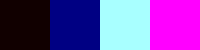

In [71]:
%gridimage namaste

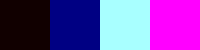

In [74]:
# To access the image in a variable, use underscore 
img = _
img

For cell magics, invoked with %%, you can pass multi-line data

In [60]:
#on cell magics

@register_cell_magic
def my_todo(line, cell):
    print ("line: {}".format(line))
    print (cell)
    

In [61]:
%%my_todo
Hello 
Namaste

line: 
Hello 
Namaste



In [66]:
# creating test dataframe 
import pandas as pd
from io import StringIO

@register_cell_magic
def framer(line, cell):
    data = StringIO(cell)
    return pd.read_csv(data)
    

In [67]:
%%framer
session, userid, productid
123, amy, 100
111, ravi, 200
100, joe, 300

,session,userid,productid
0,123,amy,100
1,111,ravi,200
2,100,joe,300


In [69]:
# and to access the data in a variable, we use the underscore variable
df = _
df

,session,userid,productid
0,123,amy,100
1,111,ravi,200
2,100,joe,300


Now lets put all our magics in a python module so the extension can be loaded in other notebooks. 
Jupyter extension system expects us to define a function by name `load_ipython_extension(ipython)`.   
This function will be called by Jupyter extension system to do the actual magic registration. 

Note we use another magic to actually write a new file using `%%writefile filename.py` magic

In [77]:
%%writefile custommagics.py

from PIL import Image
import numpy as np
import pandas as pd
from io import StringIO


## line magic

def gridimage(line):
    
    print (line)
    rows = 50
    columns = 200
    channels = 3
    data = np.zeros([rows, columns, channels], dtype=np.uint8)
    
    color1 = np.random.randint(255)
    color2 = np.random.randint(255)
    color3 = np.random.randint(255)
    
    data[:50, :50 ] = [color1, 0, 0]
    data[:50, 50:100 ] = [0,0, color2]
    data[:50, 100:150 ] = [color3,255, 255]
    data[:50, 150: ] = [255,0, 255]
    img = Image.fromarray(data)
    return img

## cell magic

def framer(line, cell):
    data = StringIO(cell)
    return pd.read_csv(data)



def load_ipython_extension(ipython):
    ipython.register_magic_function(gridimage, 'line')
    ipython.register_magic_function(framer, 'cell')
    
    

Writing custommagics.py


As a test, load the magic in a brand new notebook using command:  
`%load_ext custommagics.py`  
And then try out `%gridimage 1` or `%%framer` magics 